___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [272]:
# libraries for EDA
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
from termcolor import colored

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline



# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.metrics import accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, auc, matthews_corrcoef

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [273]:
def show_distribution(col):
    
    '''
    
    This function will prints a Histogram and box plot which are graphical representations 
    for the frequency of numeric data values. It aims to describe the data and explore 
    the central tendency and variability before using advanced statistical analysis techniques. 
    
    '''
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))    
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))
    
    
    
    
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(15, 15))

    # Plot the histogram   
    ax[0].hist(col, bins=30)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val,  color='yellow',     linestyle='dashed', linewidth=2, label='Minimum')
    ax[0].axvline(x=mean_val, color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val,  color='cyan',       linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=mod_val,  color='purple',     linestyle='dashed', linewidth=2, label='Mode')
    ax[0].axvline(x=max_val,  color='red',        linestyle='dashed', linewidth=2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot   
    medianprops = dict(linestyle='-', linewidth=3, color='m')
    boxprops=dict(linestyle='-', linewidth=1.5)
    meanprops={"marker":"d", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"}
    flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'fuchsia'}
    
    ax[1].boxplot(col, 
                  vert=False,
                  notch=True, 
                  patch_artist=False,
                  medianprops=medianprops,
                  flierprops=flierprops,
                  showmeans=True,
                  meanprops=meanprops)
    
    ax[1].set_xlabel('value', fontsize=10)
    

    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=15)

In [274]:
def show_density(col):
    
    '''
    
    This function plots a 'density plot' which is a representation of the distribution of a numeric variableand display it. 
    It uses a kernel density estimate to show the probability density function of the variable.
    
    '''    
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(15, 5))

    # Plot density
    col.plot.density()

    # Add titles and labels
    plt.title('Data Density', fontsize=15)

    # Show the mean, median, and mode
    plt.axvline(x=col.mean(),    color='cyan',   linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(x=col.median(),  color='red',    linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(x=col.mode()[0], color='yellow', linestyle='dashed', linewidth=2, label='Mode')
    plt.legend()

    # Show the figure
    plt.show()

In [275]:
def show_compare(df, col1, col2):
    
    '''
    This function makes comparison among subcategories of target variable according to another variable.
    ''' 
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))
    min_val = df[col1].min()
    max_val = df[col1].max()
    mean_val = df[col1].mean()
    med_val = df[col1].median()
    mod_val = df[col1].mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))

    fig, ax = plt.subplots(figsize=(12, 6))

    ax = sns.kdeplot(data=df, x=col1, hue=col2, fill=True)
    
    plt.title("Data Density", fontsize=20, color="darkblue")
    ax.ticklabel_format(style='plain')

    h, l = ax.get_legend_handles_labels()

    legend_elements1 = [Line2D([0], [0], marker='s', color='lightblue', label=df[col2].unique()[0], markersize=15),
                       Line2D([0], [0], marker='s', color='orange', label=df[col2].unique()[1], markersize=15)]
    l1 = plt.legend(handles=legend_elements1, title='Left Type', bbox_to_anchor=(0.84, 1))

    legend_elements2 = [Line2D([0], [0], color='green',  label='Overall Mean',   markersize=15, linestyle='dashed'),
                        Line2D([0], [0], color='blue',   label='Group Mean', markersize=15, linestyle='-'),
                        Line2D([0], [0],  color='orange', label='Group Mean', markersize=15, linestyle='-'),
                        Line2D([0], [0],  color='red',    label='Median', markersize=15, linestyle='dashed'),
                        Line2D([0], [0],  color='yellow', label="Mode",   markersize=15, linestyle='dashed')]
    l2 = plt.legend(handles=legend_elements2,
                    title=f"Overall Mean {round(df[col1].mean(), 2)}\
                    \nGroup Mean {round(df.groupby([col2])[col1].mean()[0], 2)}\
                    \nGroup Mean {round(df.groupby([col2])[col1].mean()[1], 2)}\
                    \nOverall Median {round(np.median(df[col1]), 2)}\
                    \nOverall Mode {round(df[col1].mode()[0], 2)}", 
                    bbox_to_anchor=(0.9, 0.81))

    plt.axvline(x=df[col1].mean(),    color='green',   linestyle='dashed', linewidth=2, label='Overall Mean')
    plt.axvline(x=df[col1].median(),  color='red',     linestyle='dashed', linewidth=2, label='Overall Median')
    plt.axvline(x=df[col1].mode()[0], color='yellow',  linestyle='dashed', linewidth=2, label='Overall Mode')
    
    
    group_mean1 = df.groupby([col2])[col1].mean()[0]
    group_mean2 = df.groupby([col2])[col1].mean()[1]
    
    plt.axvline(x=group_mean1, color='blue',  linestyle='-', linewidth=2, label='Group Mean')
    plt.axvline(x=group_mean2, color='orange',  linestyle='-', linewidth=2, label='Group Mean')    


    ax.add_artist(l1); # we need this because the 2nd call to legend() erases the first one

In [276]:
def measure_single_prediction_time(model, test_data):
    """
    Measure the prediction time for a machine learning model on a test data point.

    Args:
        model (object): The trained machine learning model.
        test_data (numpy.ndarray): A 2D array of shape (1, num_features) containing the test data point.

    Returns:
        float: The prediction time in seconds.
    """
    start_time = time.time()
    predictions = model.predict(test_data)
    end_time = time.time()
    prediction_time = end_time - start_time
    return prediction_time

In [277]:
def measure_prediction_time(model, test_data, num_tests=10, method='mean'):
    """
    Measure the mean or median prediction time for a machine learning model on a test data point.

    Args:
        model (object): The trained machine learning model.
        test_data (numpy.ndarray): A 2D array of shape (1, num_features) containing the test data point.
        num_tests (int): The number of tests to perform. Defaults to 10.
        method (str): The method used to calculate the prediction time. Can be 'mean' or 'median'. Defaults to 'mean'.

    Returns:
        float: The mean or median prediction time in seconds.
    """
    prediction_times = np.zeros(num_tests)
    for i in range(num_tests):
        prediction_times[i] = measure_single_prediction_time(model, test_data)

    if method == 'mean':
        # Calculate the mean prediction time
        prediction_time = np.mean(prediction_times)
    elif method == 'median':
        # Calculate the median prediction time
        prediction_time = np.median(prediction_times)
    else:
        raise ValueError(f"Invalid method '{method}'. Valid options are 'mean' and 'median'.")

    return prediction_time

## 1. Exploratory Data Analysis

In [278]:
df = pd.read_csv('HR_Dataset.csv')
df0 = df.copy()

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
from skimpy import clean_columns

In [ ]:
df = clean_columns(df)

2 column names have been cleaned

In [ ]:
df.rename(columns={"average_montly_hours": "average_monthly_hours"}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

3008

In [ ]:
df.shape

(14999, 10)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.shape

(11991, 10)

In [ ]:
df.sample(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
1522,0.41,0.56,2,160,3,0,1,0,sales,low


In [ ]:
target_column = df['left']

target = pd.DataFrame(target_column)

features = df.drop('left', axis=1)

df = pd.concat([features, target], axis=1)

df.sample(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary,left
8176,0.53,0.49,3,158,3,0,0,sales,medium,0


In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
promotion_last_5years    0
departments              0
salary                   0
left                     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_monthly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0


In [ ]:
df_numeric =  df.select_dtypes('number')
df_numeric

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,1,0
11987,0.74,0.95,5,266,10,0,1,0
11988,0.85,0.54,3,185,10,0,1,0
11989,0.33,0.65,3,172,10,0,1,0


In [ ]:
df["departments"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
# RandD = Research & Development

In [ ]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

## 2. Data Visualization

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'departments', 'salary', 'left'],
      dtype='object')

In [ ]:
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [ ]:
df['left'].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

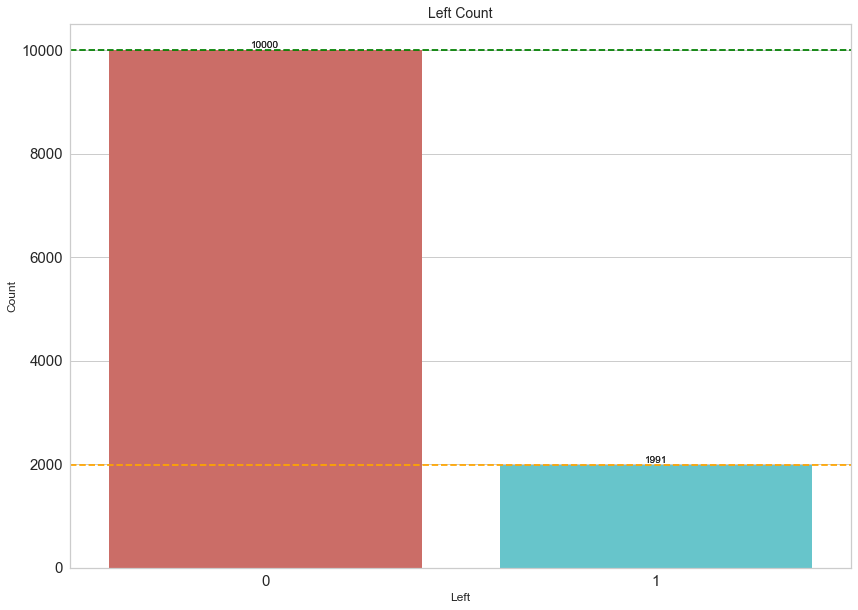

In [ ]:
plt.figure(figsize=(14, 10))

sns.countplot(x='left', data=df, palette='hls')
plt.axhline(y=df.left.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.left.value_counts()[0], color='green', linestyle='--')

for p in sns.countplot(x='left', data=df, palette='hls').patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, height, ha="center", va="bottom")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title("Left Count", fontsize=14)
plt.xlabel("Left", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

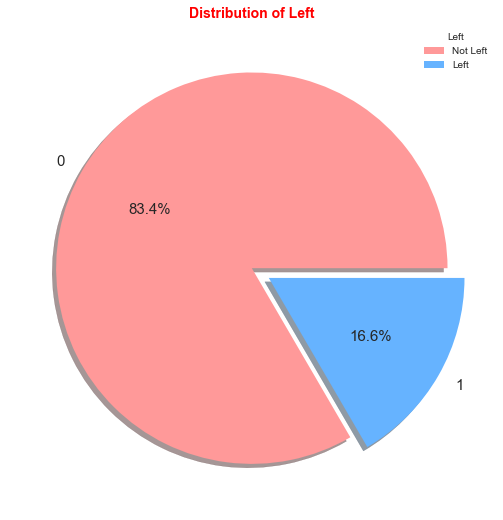

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))

colors = ['#ff9999', '#66b3ff']  # Custom colors

ax.pie(x=df.left.value_counts().values, 
       labels=['0', '1'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=colors,
       textprops={'fontsize': 15},
       shadow=True
       )

# Add a legend
ax.legend(title='Left', labels=['Not Left', 'Left'], loc='upper right', fontsize=10)

# Set the title appearance
plt.title("Distribution of Left", fontdict={"color": "red", 'fontsize': 14, 'fontweight': 'bold'})

plt.show()


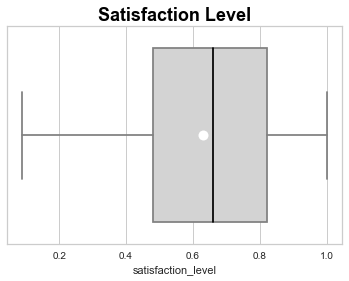

In [ ]:
sns.boxplot(data=df, 
            x="satisfaction_level",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":10},
            boxprops={"facecolor": "lightgray", "edgecolor": "gray"},  # Customize box color
            whiskerprops={"color": "gray"},  # Customize whisker color
            capprops={"color": "gray"},  # Customize caps color
            medianprops={"color": "black"},  # Customize median line color
            flierprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"}  # Customize outlier marker color
            )

plt.title("Satisfaction Level", fontsize=18, color="black", fontweight="bold")

plt.show()


Text(0.5, 1.0, 'Satisfaction level')

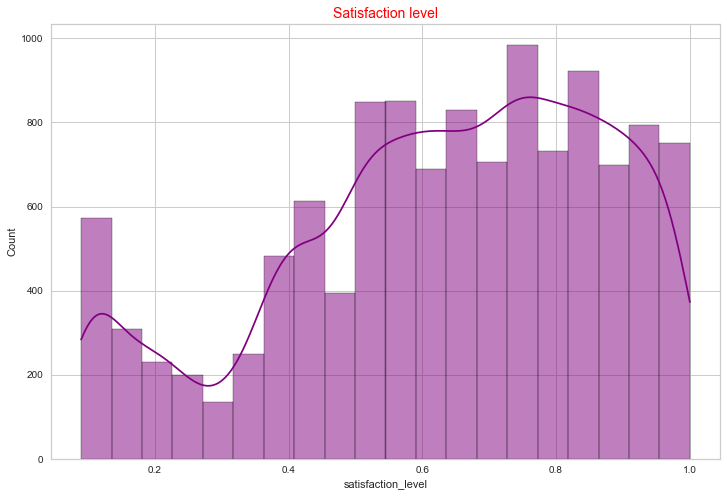

In [ ]:
plt.figure(figsize=(12, 8))

sns.histplot(data=df, x="satisfaction_level", bins=20, kde=True, color="purple")
plt.title("Satisfaction level", fontsize=14, color="red")

In [ ]:
print('Descriptive Statistics of the satisfaction_level Feature:\n')
df.satisfaction_level.describe()

Descriptive Statistics of the satisfaction_level Feature:



count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

Statistical Calculations :
--------------------------
Minimum:   0.09
Mean:      0.63
Median:    0.66
Mode:      0.74
Maximum:   1.00



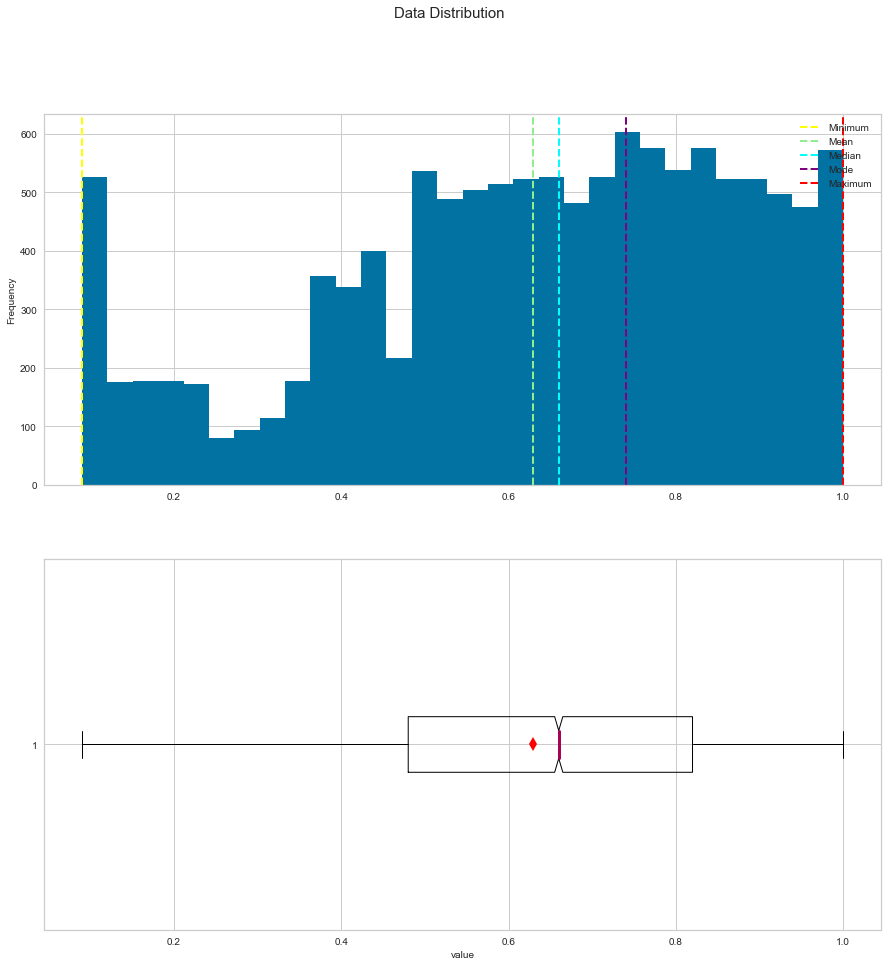

In [ ]:
show_distribution(df["satisfaction_level"])

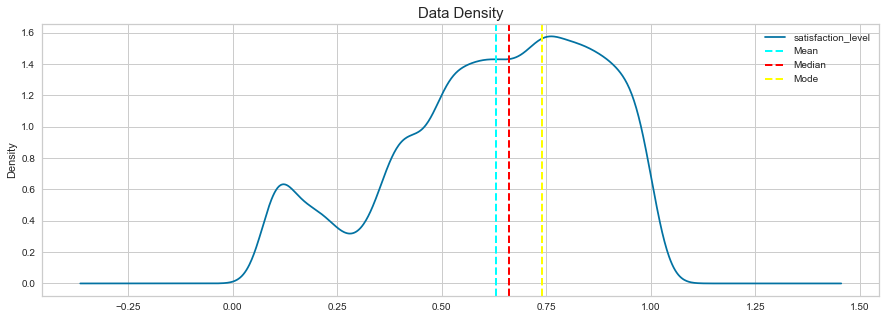

In [ ]:
show_density(df["satisfaction_level"])

In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


In [ ]:
print('Dataset describe results according to the "left==1" condition','green')
df[df['left'] == 1].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

Dataset describe results according to the "left==1" condition green


,count,mean,std,min,25%,50%,75%,max
satisfaction_level,1991.000000,0.440271,0.265207,0.090000,0.110000,0.410000,0.730000,0.920000
last_evaluation,1991.000000,0.721783,0.197436,0.450000,0.520000,0.790000,0.910000,1.000000
number_project,1991.000000,3.883476,1.817139,2.000000,2.000000,4.000000,6.000000,7.000000
average_monthly_hours,1991.000000,208.162230,61.295145,126.000000,146.000000,226.000000,262.500000,310.000000
time_spend_company,1991.000000,3.881467,0.974041,2.000000,3.000000,4.000000,5.000000,6.000000
work_accident,1991.000000,0.052737,0.223565,0.000000,0.000000,0.000000,0.000000,1.000000
promotion_last_5years,1991.000000,0.004018,0.063277,0.000000,0.000000,0.000000,0.000000,1.000000
left,1991.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print('Dataset describe results according to the "left==0" condition','green')
df[df['left'] == 0].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

Dataset describe results according to the "left==0" condition green


,count,mean,std,min,25%,50%,75%,max
satisfaction_level,10000.000000,0.667365,0.217082,0.120000,0.540000,0.690000,0.840000,1.000000
last_evaluation,10000.000000,0.715667,0.161919,0.360000,0.580000,0.710000,0.850000,1.000000
number_project,10000.000000,3.786800,0.981755,2.000000,3.000000,4.000000,4.000000,6.000000
average_monthly_hours,10000.000000,198.942700,45.665507,96.000000,162.000000,198.000000,238.000000,287.000000
time_spend_company,10000.000000,3.262000,1.367239,2.000000,2.000000,3.000000,4.000000,10.000000
work_accident,10000.000000,0.174500,0.379558,0.000000,0.000000,0.000000,0.000000,1.000000
promotion_last_5years,10000.000000,0.019500,0.138281,0.000000,0.000000,0.000000,0.000000,1.000000
left,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# df['satisfaction_level'].value_counts().iplot(kind="bar", title = '"satisfaction_level" Column Distribution')

In [ ]:
# px.histogram(df, x = df['satisfaction_level'], color='left', marginal = "box", hover_data = df.columns, 
#              title = 'satisfaction_level and left')

In [ ]:
# pd.crosstab(df['satisfaction_level'], df['left']).iplot(kind='bar', title = 'satisfaction_level and left')

In [ ]:
df.corr(method='pearson')[7:]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,left
left,-0.350558,0.01352,0.030928,0.070409,0.173295,-0.125436,-0.044657,1.0


In [ ]:
# df['last_evaluation'].value_counts().iplot(kind="bar", title = '"last_evaluation" Column Distribution')

In [ ]:
# px.histogram(df, x = df['last_evaluation'], color='left', marginal = "box", hover_data = df.columns, 
#              title = 'last_evaluation and left')

In [ ]:
# fig = px.pie(df, values = df['number_project'].value_counts(), 
#              names = (df['number_project'].value_counts()).index, 
#              title = '"number_project" Column Distribution')
# fig.show()

In [ ]:
# px.histogram(df, x = df['number_project'], color='left', marginal = "box", hover_data = df.columns, 
#              title = 'number_project and left')

In [ ]:
# pd.crosstab(df['number_project'], df['left']).iplot(kind='bar', title = 'number_project and left')

**It's clear that the employees who made 2, 6 and 7 projects are more inclined to leave their works. It's normal to expect employees who made more projects but not getting more salary or feeling more satisfaction to leave their works;however, those who left even though making less projects should be scrutinized more meticulously.** 

(0.0, 100.0)

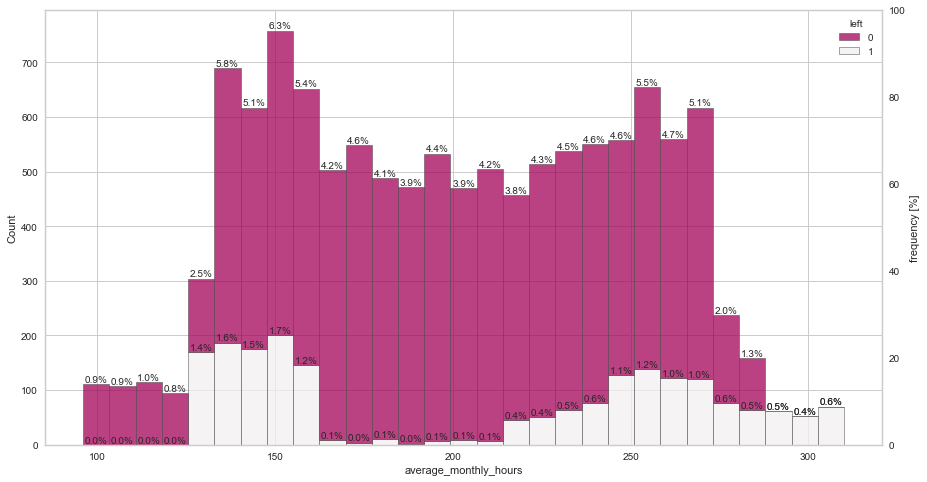

In [ ]:
plt.figure(figsize=(15, 8))
fig = sns.histplot(
    df,
    x="average_monthly_hours", hue="left",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0,100)

It can be stated that tendency to left company regarding work-load has five phases;
   - **Below 125 hours/month** there is **no churn**
   - **125-160 hours/month** churn rate **is highest**
   - **160-220 hours/month** churn rate **very low (neglectable)**
   - **220-288 hours/month** churn rate **high (has a bell shape)**
   - **Over 288 hours/month** churn rate **%100!!!**

In [ ]:
# pd.crosstab(df['time_spend_company'], df['left']).iplot(kind='bar', title = 'time_spend_company and left')

- Looking at the 'time_spent_company' values, there is an increase in turnover in the 3rd working year, but this increase gradually decreases until the 6th working year. 

In [ ]:
# fig = px.pie(df, values = df['work_accident'].value_counts(), 
#              names = (df['work_accident'].value_counts()).index, 
#              title = '"work_accident" Column Distribution')
# fig.show()

In [ ]:
# px.histogram(df, x = df['work_accident'], color='left', marginal = "box", hover_data = df.columns, 
#              title = 'work_accident and left')

**- 'work_accident' column has binary type values.**
**- While the employees who don't get involved in accident are more likely to leave with a value of 22.84%, those  who get involved in accident are less likely to leave with a value of 6.02%.**  
**- Altough it does not appear to be a determining factor and needs to be examined carefully by looking at the conditions at workplace, companies' policies and etc.; in fact, it could be said that the left rate of those who have got involved in a work accident is proportionally lower than those who did NOT.** 

In [ ]:
# fig = px.pie(df, values = df['promotion_last_5years'].value_counts(), 
#              names = (df['promotion_last_5years'].value_counts()).index, 
#              title = '"promotion_last_5years" Column Distribution')
# fig.show()

In [ ]:
# pd.crosstab(df['promotion_last_5years'], df['left']).iplot(kind='bar', title = 'promotion_last_5years and left')

**- 'promotion_last_5years' column has binary type values.**<br>
**- Receiving a promotion in the last 5 working years is not determinant in terms of leaving or continuing to work.**<br> 
**- However, the percentage of those who receive promotions, even if it is small, are higher than those who do not.**

In [ ]:
# pd.crosstab(df['departments'], df['left']).iplot(kind='bar', title = 'department and left')

**- It is not observed that the departments which require the employees to work alone have an effect on the decision of "left".**<br> 
**- It is seen that the left percentages of the departments are quite similar.** 

In [ ]:
df.salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [ ]:
# px.histogram(df, x = df['salary'], color='left', marginal = "box", hover_data = df.columns, 
#              title = 'salary and left')

**- Naturally as salary rises, churn rate decreeses**.<br>
**- Even if it is small, there is an increase in the form of high-medium-low according to the salary status.** 

In [ ]:
numerical= df.drop(['left'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

In [ ]:
# for i, col in enumerate(df[categorical].columns):
#     fig = px.histogram(df[col], color=df["left"], width=800, height=800, title=col, pattern_shape=df["salary"], pattern_shape_sequence=["x", ".", "+"])
#     fig.show()

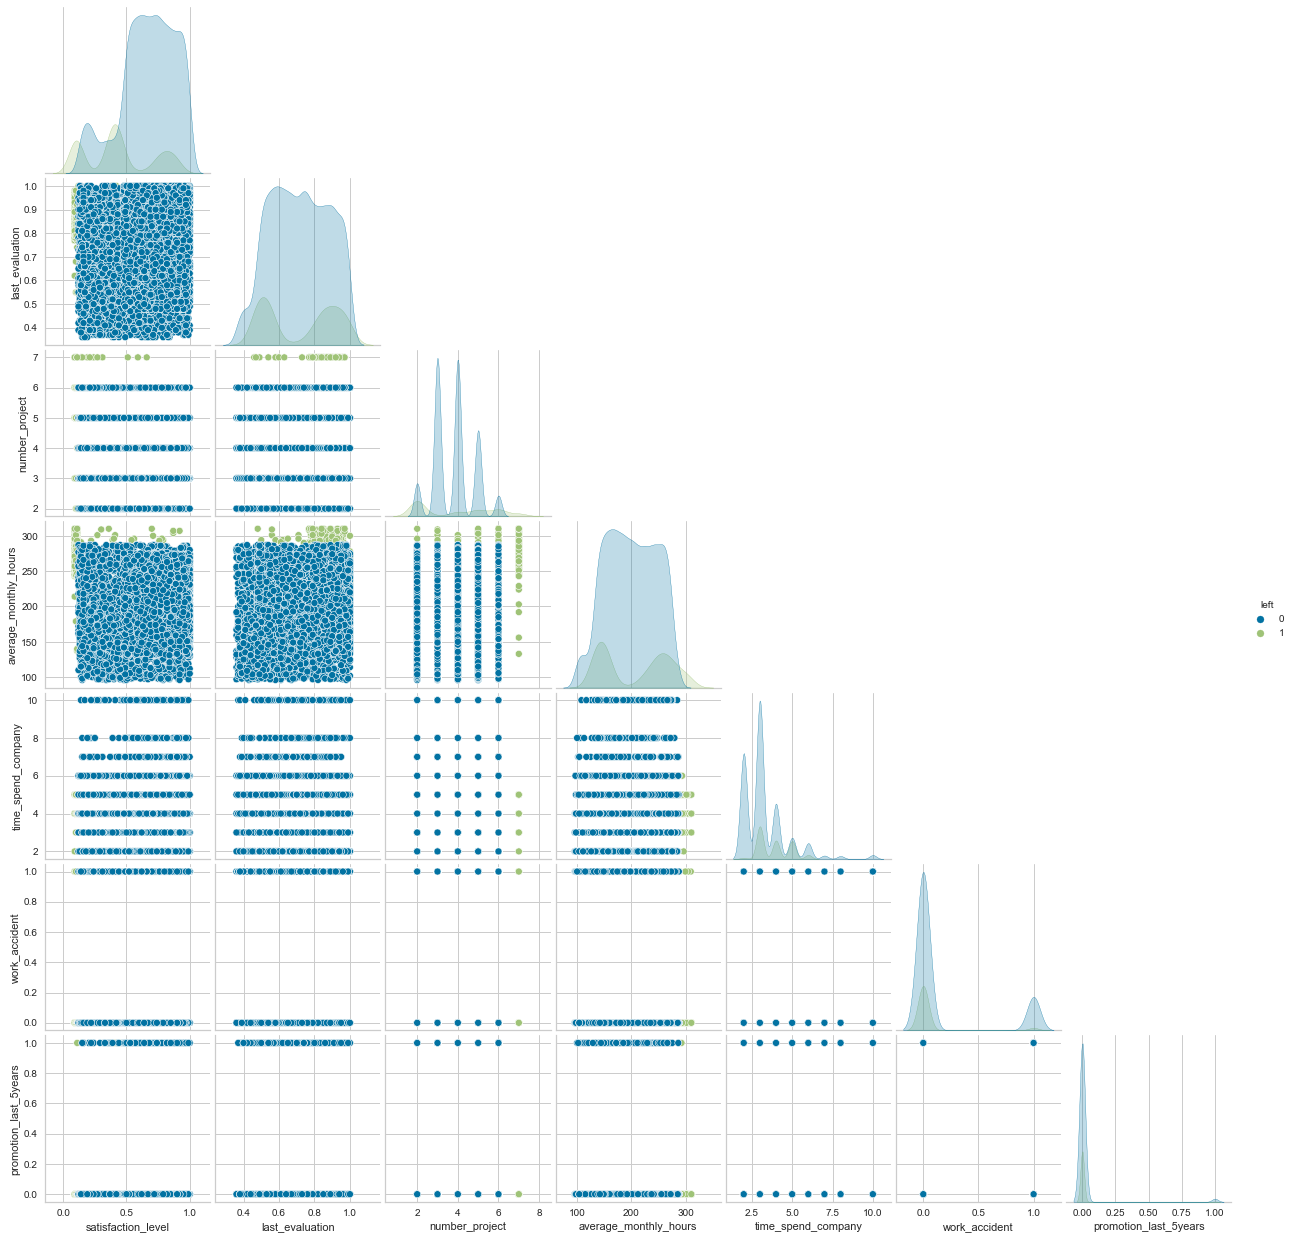

In [ ]:
sns.pairplot(df, hue = "left", corner = True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'satisfaction_level'),
  Text(1.5, 0, 'last_evaluation'),
  Text(2.5, 0, 'number_project'),
  Text(3.5, 0, 'average_monthly_hours'),
  Text(4.5, 0, 'time_spend_company'),
  Text(5.5, 0, 'work_accident'),
  Text(6.5, 0, 'promotion_last_5years'),
  Text(7.5, 0, 'left')])

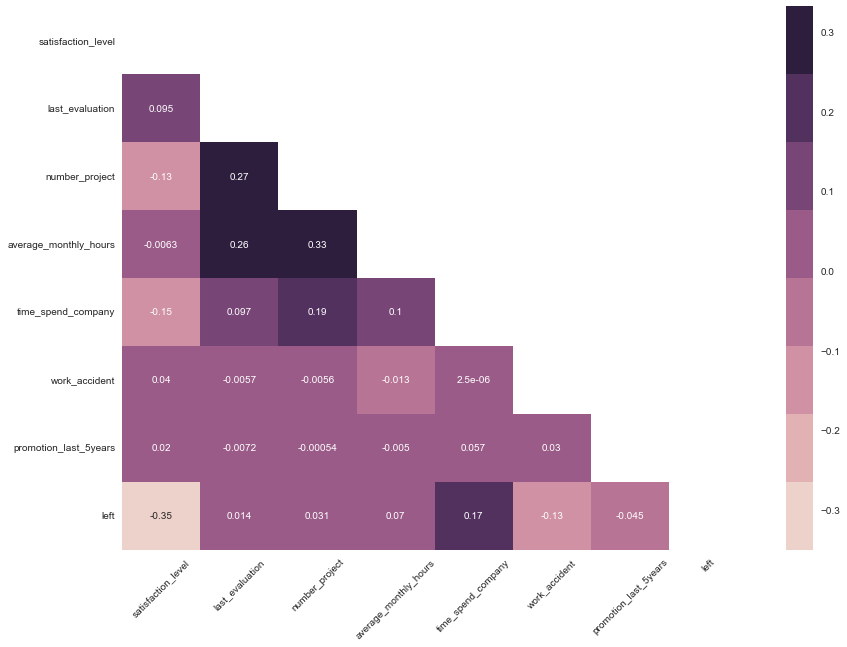

In [ ]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45)

In [ ]:
# for i in numerical:
#     df[i].iplot(kind = 'box', title = i, boxpoints = 'all')

In [ ]:
df_temp = df.corr()

count = 'Done'
feature =[]
collinear= []
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i] > .9 and df_temp[col][i] < 1) or (df_temp[col][i] < -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f'\033[1mmulticolinearity alert in between\033[0m {col} - {i}')
        else:
            print(f'For {col} and {i}, there is NO multicollinearity problem') 

print('\033[1mThe number of strong corelated features:\033[0m', count) 

For satisfaction_level and satisfaction_level, there is NO multicollinearity problem
For satisfaction_level and last_evaluation, there is NO multicollinearity problem
For satisfaction_level and number_project, there is NO multicollinearity problem
For satisfaction_level and average_monthly_hours, there is NO multicollinearity problem
For satisfaction_level and time_spend_company, there is NO multicollinearity problem
For satisfaction_level and work_accident, there is NO multicollinearity problem
For satisfaction_level and promotion_last_5years, there is NO multicollinearity problem
For satisfaction_level and left, there is NO multicollinearity problem
For last_evaluation and satisfaction_level, there is NO multicollinearity problem
For last_evaluation and last_evaluation, there is NO multicollinearity problem
For last_evaluation and number_project, there is NO multicollinearity problem
For last_evaluation and average_monthly_hours, there is NO multicollinearity problem
For last_evaluat

### Based on the examinations made above;

**- There is no multicollinearity problem among the features.**<br>
**- We have weak level correlation between the numerical features and the target column.**<br>
**- Also there is weak level correlation between the columns.**<br>
**- Target variable demonstrates a slight negative correlation with the variables of "satisfaction_level", "promotion_last_5years" and 'work_accident',**<br> 
**- Target variable of "left" demonstrates weak correlation with the variables of 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'department' and 'salary'.**<br>
**- "satisfaction_level", even if it's quite small, has more influence on the decision to leave work with a negative value than other features.**<br>
**- The increase in spending time at workplace positively affects the decision to leave with the company.** 

"number_project" Column Distribution green


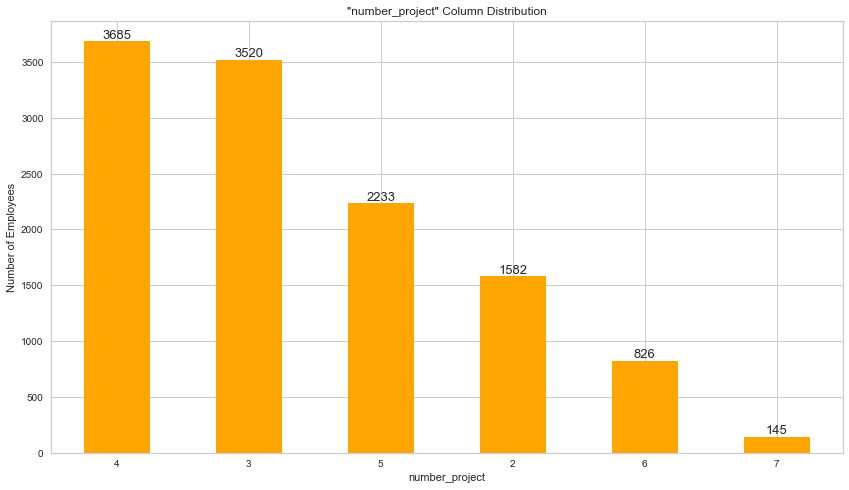

In [ ]:
print('"number_project" Column Distribution','green')
fig = plt.figure(figsize = (11,6))
ax = fig.add_axes([0,0,1,1])
# x = df.number_project.value_counts().index
# y = df.number_project.value_counts().values
df.number_project.value_counts().plot(kind = "bar", color = "orange")
plt.title('"number_project" Column Distribution')   
plt.xlabel('number_project') 
plt.ylabel('Number of Employees')
plt.xticks(rotation = 0)
for index,value in enumerate(df.number_project.value_counts().sort_values(ascending=False)):
    plt.text(index, value, f'{value}', ha = 'center', va = 'bottom', fontsize = 13)
plt.show()

"time_spend_company" Column Distribution green


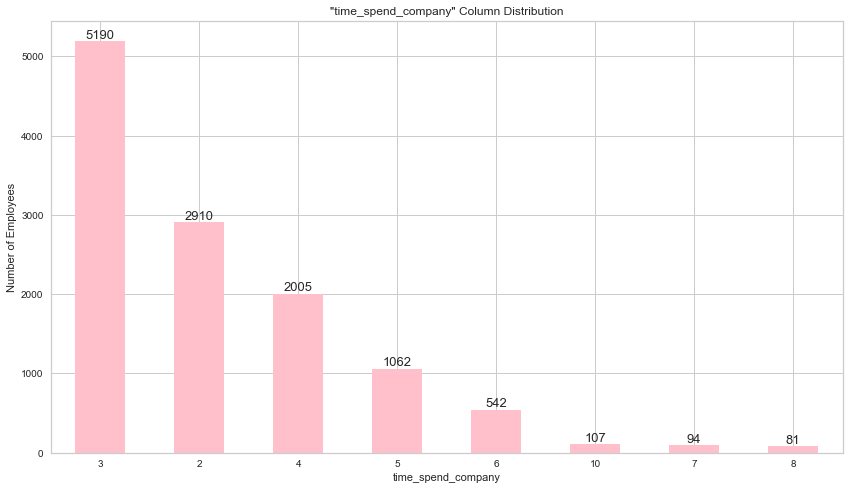

In [ ]:
print('"time_spend_company" Column Distribution','green')
fig = plt.figure(figsize = (11,6))
ax = fig.add_axes([0,0,1,1])
df.time_spend_company.value_counts().plot(kind = "bar", color = "pink")
plt.title('"time_spend_company" Column Distribution')   
plt.xlabel('time_spend_company') 
plt.ylabel('Number of Employees')
plt.xticks(rotation = 0)
for index,value in enumerate(df.time_spend_company.value_counts().sort_values(ascending=False)):
    plt.text(index, value, f'{value}', ha = 'center', va = 'bottom', fontsize = 13)
plt.show()

## 3. Data Pre-Processing

In [ ]:
df1 = df.drop('left', axis = 1)
df1.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low


In [ ]:
df1 = pd.get_dummies(df1, columns = ['departments','salary'], drop_first = True)
df1.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df1)
#Store it separately for clustering
df1_scaled= scaler.transform(df1)

In [ ]:
df1_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.83516484, 0.28125   , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.26373626, 0.453125  , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.45054945, 0.578125  , 0.4       , ..., 0.        , 1.        ,
        0.        ]])

## 4. Cluster Analysis

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
from sklearn.neighbors import BallTree


def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [ ]:
hopkins(df1_scaled,df1.shape[0])

0.08266210130579764

In [ ]:
from sklearn.cluster import KMeans

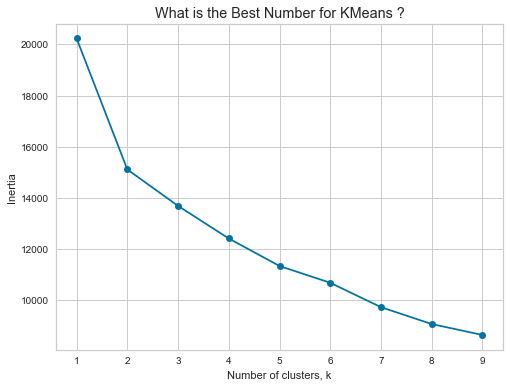

In [ ]:
#First : Get the Best KMeans 
ks = range(1,10)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(df1_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(8, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

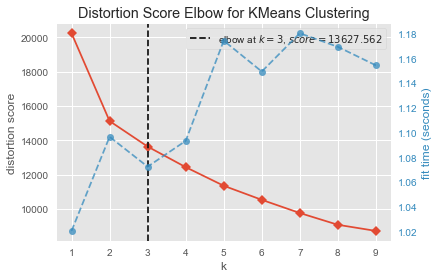

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(df1_scaled)
visu.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
ssd =[]

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df1_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.24293849820807237
Silhouette Score for 3 clusters: 0.19250986825854602
Silhouette Score for 4 clusters: 0.17900983631836617
Silhouette Score for 5 clusters: 0.2169363940114809
Silhouette Score for 6 clusters: 0.24421933609012644
Silhouette Score for 7 clusters: 0.27221236712930497
Silhouette Score for 8 clusters: 0.2937538680425062
Silhouette Score for 9 clusters: 0.30131521146150086


In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


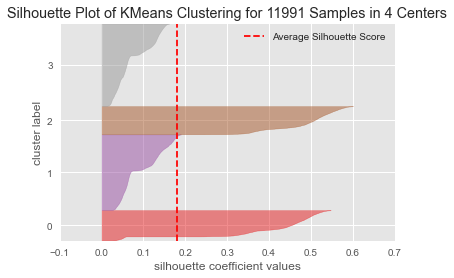

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 11991 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model_4 = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model_4)
visualizer.fit(df1_scaled)    # Fit the data to the visualizer
visualizer.poof()

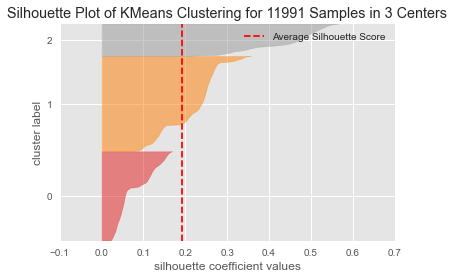

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 11991 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model_3 = KMeans(n_clusters=3, random_state=101)
visualizer = SilhouetteVisualizer(model_3)
visualizer.fit(df1_scaled)    # Fit the data to the visualizer
visualizer.poof()

In [ ]:
k_means_model = KMeans(n_clusters = 3, random_state = 101)
k_means_model.fit_predict(df1_scaled)
labels = k_means_model.labels_
labels

array([2, 1, 1, ..., 0, 0, 0])

In [ ]:
df['predicted_clusters'] = labels
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary,left,predicted_clusters
0,0.38,0.53,2,157,3,0,0,sales,low,1,2
1,0.80,0.86,5,262,6,0,0,sales,medium,1,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1,1
3,0.72,0.87,5,223,5,0,0,sales,low,1,2
4,0.37,0.52,2,159,3,0,0,sales,low,1,2
...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,1,management,high,0,0
11987,0.74,0.95,5,266,10,0,1,management,high,0,0
11988,0.85,0.54,3,185,10,0,1,management,high,0,0
11989,0.33,0.65,3,172,10,0,1,marketing,high,0,0


In [ ]:
df['predicted_clusters'].value_counts()

1    5261
0    4940
2    1790
Name: predicted_clusters, dtype: int64

In [ ]:
# fig = px.pie(df, values = df['predicted_clusters'].value_counts(), 
#              names = (df['predicted_clusters'].value_counts()).index, 
#              title = 'Predicted_Clusters Distribution')
# fig.show()

In [ ]:
# fig = px.pie(df, values = df[df['left']==0]['predicted_clusters'].value_counts(), 
#              names = df[df['left']==0]['predicted_clusters'].value_counts().index, 
#              title = 'Predicted_Clusters_Almost_Lost Distribution')
# fig.show()

In [ ]:
# pd.crosstab(df['left'], 
#             df['predicted_clusters']).iplot(kind="bar", title = 'Compare (left vs predicted-clusters)',
#             xTitle = 'left & clusters', yTitle = 'counts')

In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,predicted_clusters
left,,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500,0.741000
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018,0.718734


In [ ]:
df.groupby(['left', 'predicted_clusters']).mean()

satisfaction_level  last_evaluation  number_project  \
left predicted_clusters                                                        
0    0                             0.666661         0.719521        3.787108   
     1                             0.668077         0.715167        3.786509   
     2                             0.667128         0.706511        3.786840   
1    0                             0.429574         0.721470        3.912458   
     1                             0.439896         0.724551        3.920676   
     2                             0.469940         0.716193        3.719033   

                         average_monthly_hours  time_spend_company  \
left predicted_clusters                                              
0    0                              199.073598            3.232156   
     1                              199.016251            3.304096   
     2                              198.352981            3.215216   
1    0                              208.102132            3.887767   
     1                              209.764629            3.890767   
     2                              204.601208            3.842900   

                         work_accident  promotion_last_5years  
left predicted_clusters                                        
0    0                        0.183502               0.015065  
     1                        0.168522               0.026269  
     2                        0.167923               0.010966  
1    0                        0.049383               0.003367  
     1                        0.062419               0.003901  
     2                        0.039275               0.006042

In [ ]:
# pd.crosstab(df['predicted_clusters'], 
#             df['left']).iplot(kind="bar", title = 'Compare (predicted-clusters vs left)',
#             xTitle = 'clusters & left', yTitle = 'counts')

In [ ]:
df.groupby(['predicted_clusters', 'left']).mean()

satisfaction_level  last_evaluation  number_project  \
predicted_clusters left                                                        
0                  0               0.666661         0.719521        3.787108   
                   1               0.429574         0.721470        3.912458   
1                  0               0.668077         0.715167        3.786509   
                   1               0.439896         0.724551        3.920676   
2                  0               0.667128         0.706511        3.786840   
                   1               0.469940         0.716193        3.719033   

                         average_monthly_hours  time_spend_company  \
predicted_clusters left                                              
0                  0                199.073598            3.232156   
                   1                208.102132            3.887767   
1                  0                199.016251            3.304096   
                   1                209.764629            3.890767   
2                  0                198.352981            3.215216   
                   1                204.601208            3.842900   

                         work_accident  promotion_last_5years  
predicted_clusters left                                        
0                  0          0.183502               0.015065  
                   1          0.049383               0.003367  
1                  0          0.168522               0.026269  
                   1          0.062419               0.003901  
2                  0          0.167923               0.010966  
                   1          0.039275               0.006042

## 5. Predictive Model Building

### Preprocessing

In [ ]:
df2 = df.drop('predicted_clusters', axis = 1)
df2.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Specify the categorical columns to be encoded
categorical_columns = ['departments', 'salary']

# Create an instance of the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [ ]:
X = df2.drop('left', axis = 1)
y = df2['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 101)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Specify the categorical columns to be encoded
categorical_columns = ['departments', 'salary']

# Create an instance of the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [ ]:
# Perform ordinal encoding on the specified columns
X_train[categorical_columns] = ordinal_encoder.fit_transform(X_train[categorical_columns])
X_test[categorical_columns] = ordinal_encoder.transform(X_test[categorical_columns])

In [280]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [281]:
X_train

array([[0.86813187, 0.234375  , 0.2       , ..., 0.        , 0.77777778,
        1.        ],
       [0.28571429, 0.25      , 0.6       , ..., 0.        , 0.33333333,
        0.5       ],
       [0.31868132, 0.328125  , 0.        , ..., 0.        , 0.77777778,
        0.5       ],
       ...,
       [0.61538462, 0.375     , 0.2       , ..., 0.        , 0.88888889,
        0.        ],
       [0.71428571, 0.125     , 0.6       , ..., 0.        , 1.        ,
        1.        ],
       [0.65934066, 0.984375  , 0.2       , ..., 0.        , 0.88888889,
        0.5       ]])

In [179]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [123]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

In [124]:
from pycaret.classification import *

employee_clf = setup(df2, target = 'left', 
                     session_id = 123, 
                     train_size=0.8, 
                     log_experiment=True, 
                     log_plots=True, 
                     experiment_name = 'employee_churn_model')

,Description,Value
0,Session id,123
1,Target,left
2,Target type,Binary
3,Original data shape,"(11991, 10)"
4,Transformed data shape,"(11991, 21)"
5,Transformed train set shape,"(9592, 21)"
6,Transformed test set shape,"(2399, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [125]:
from pycaret.classification import compare_models
best_model_scores = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:44:30
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9845,0.9869,0.9240,0.9814,0.9518,0.9425,0.9432,0.6040
xgboost,Extreme Gradient Boosting,0.9837,0.9834,0.9222,0.9789,0.9496,0.9399,0.9406,0.6000
rf,Random Forest Classifier,0.9830,0.9789,0.9121,0.9845,0.9469,0.9368,0.9378,0.5490
gbc,Gradient Boosting Classifier,0.9817,0.9866,0.9272,0.9614,0.9438,0.9328,0.9332,0.6400
et,Extra Trees Classifier,0.9774,0.9781,0.8895,0.9720,0.9288,0.9154,0.9167,0.6280
dt,Decision Tree Classifier,0.9711,0.9523,0.9240,0.9054,0.9142,0.8969,0.8972,0.1960
ada,Ada Boost Classifier,0.9615,0.9805,0.8606,0.9031,0.8811,0.8582,0.8587,0.3740
knn,K Neighbors Classifier,0.9448,0.9531,0.8914,0.7999,0.8430,0.8097,0.8116,0.2620
qda,Quadratic Discriminant Analysis,0.8843,0.9205,0.8210,0.6209,0.7045,0.6348,0.6462,0.2060
ridge,Ridge Classifier,0.8408,0.0000,0.1167,0.6070,0.1947,0.1497,0.2142,0.1610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [126]:
from sklearn.ensemble import GradientBoostingClassifier


In [127]:
from sklearn.metrics import roc_auc_score


In [128]:
GB_model = GradientBoostingClassifier(random_state = 101)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)
y_train_pred = GB_model.predict(X_train)

GB_model_f1 = f1_score(y_test, y_pred)
GB_model_acc = accuracy_score(y_test, y_pred)
GB_model_recall = recall_score(y_test, y_pred)
GB_model_auc = roc_auc_score(y_test, y_pred)

In [190]:
print("GB_Model")
print ("------------------")
eval_metric(GB_model, X_train, y_train, X_test, y_test)

GB_Model
------------------
Test_Set
[[2976   25]
 [  45  552]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.96      0.92      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.96      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6957   42]
 [  98 1296]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.97      0.93      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

[Text(0.5, 52.0, 'Predicted Class'), Text(52.0, 0.5, 'Actual Class')]

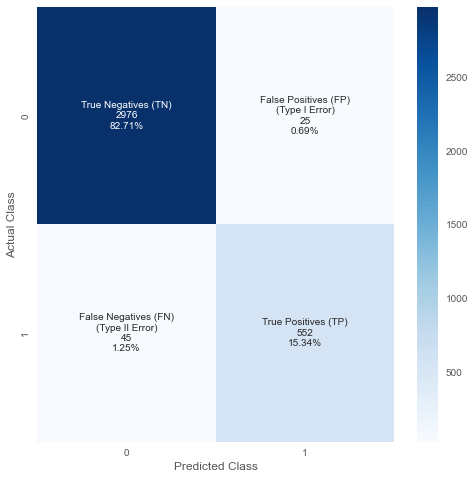

In [139]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Negatives (TN)", "False Positives (FP)\n(Type I Error)", "False Negatives (FN)\n(Type II Error)", "True Positives (TP)"]

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

plt.figure(figsize=(8, 8))

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")

In [187]:
from yellowbrick.classifier import classification_report as yb_classification_report

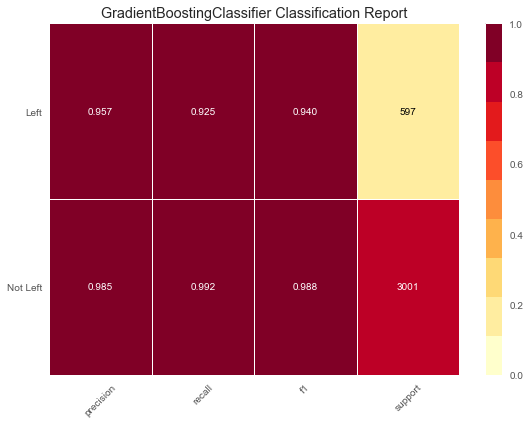

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [189]:
plt.figure(figsize=(8, 6))
visualizer = yb_classification_report(GB_model, X_train, y_train, X_test, y_test, classes=["Not Left", "Left"], support=True)
visualizer.show()

####  Prediction

In [142]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
Accuracy,0.983319,0.980545
Precision,0.968610,0.956672
Recall,0.929699,0.924623
f1,0.948755,0.940375


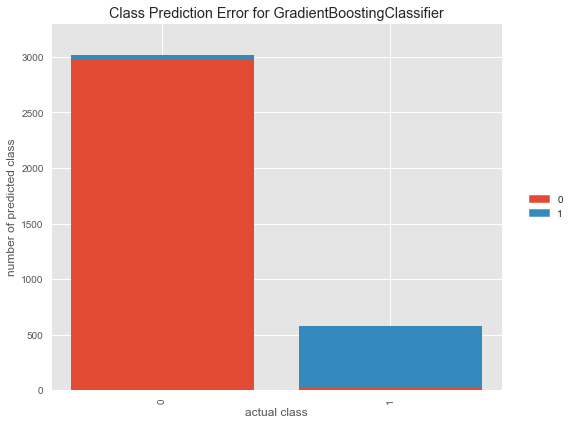

<AxesSubplot:title={'center':'Class Prediction Error for GradientBoostingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [143]:
from yellowbrick.classifier import ClassPredictionError

plt.figure(figsize=(9, 6))

visualizer = ClassPredictionError(GB_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof()

In [144]:
GB_feature_imp = pd.DataFrame(index=X.columns, data = GB_model.feature_importances_, columns = ['Importance']).sort_values("Importance", ascending = False)
GB_feature_imp

,Importance
satisfaction_level,0.526939
number_project,0.138251
time_spend_company,0.136626
last_evaluation,0.122205
average_monthly_hours,0.074804
salary,0.000465
work_accident,0.000454
departments,0.000257
promotion_last_5years,0.000000


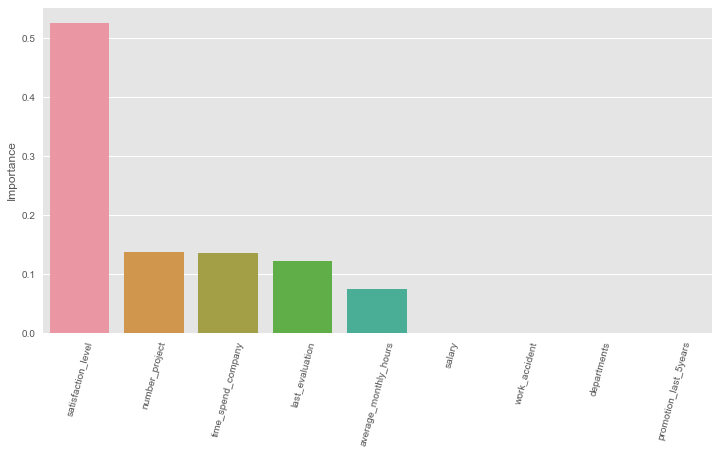

In [145]:
plt.figure(figsize = (12,6))
sns.barplot(data = GB_feature_imp.sort_values('Importance', ascending = False), x = GB_feature_imp.sort_values('Importance', ascending = False).index, y = 'Importance')
plt.xticks(rotation = 75)
plt.show()

### Gradient Boosting Classifier Cross Validation

In [146]:
GB_cv = GradientBoostingClassifier(random_state = 101)

GB_cv_scores = cross_validate(GB_cv, X_train, y_train, 
                              scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], cv = 10)
GB_cv_scores = pd.DataFrame(GB_cv_scores, index = range(1, 11))

GB_cv_scores.mean()[2:]

test_accuracy     0.980817
test_precision    0.961107
test_recall       0.921778
test_f1           0.940958
test_roc_auc      0.984509
dtype: float64

### Gradient Boosting Classifier GridSearchCV

In [147]:
param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.5, 1], 
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1], 
              'max_depth':[3, 4, 5, 6]} 

In [148]:
GB_grid = GradientBoostingClassifier(random_state = 101)
GB_grid_model = GridSearchCV(GB_grid, param_grid, scoring = "f1", verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [149]:
GB_grid_model.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=6,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=200, n_iter_no_change=None,
                           random_state=101, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [150]:
print(colored('\033[1mBest Parameters of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Gradient Boosting Model: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 4, 'n_estimators': 200, 'subsample': 1}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Gradient Boosting Model: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=6,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=200, n_iter_no_change=None,
                           random_state=101, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [192]:
GB_tuned = GradientBoostingClassifier(learning_rate = 0.01,
                                      max_depth = 6, 
                                      n_estimators = 200,
                                      subsample = 0.5,
                                      random_state = 101).fit(X_train, y_train)

In [193]:
print("GB_tuned")
print ("------------------")
eval_metric(GB_tuned, X_train, y_train, X_test, y_test)

GB_tuned
------------------
Test_Set
[[2994    7]
 [  46  551]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.99      0.92      0.95       597

    accuracy                           0.99      3598
   macro avg       0.99      0.96      0.97      3598
weighted avg       0.99      0.99      0.99      3598


Train_Set
[[6985   14]
 [ 102 1292]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.99      0.93      0.96      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.96      0.97      8393
weighted avg       0.99      0.99      0.99      8393



In [196]:
y_pred = GB_tuned.predict(X_test)
y_train_pred = GB_tuned.predict(X_train)

GB_tuned_f1 = f1_score(y_test, y_pred)
GB_tuned_acc = accuracy_score(y_test, y_pred)
GB_tuned_recall = recall_score(y_test, y_pred)
GB_tuned_auc = roc_auc_score(y_test, y_pred)

[Text(0.5, 16.0, 'Predicted Class'), Text(34.0, 0.5, 'Actual Class')]

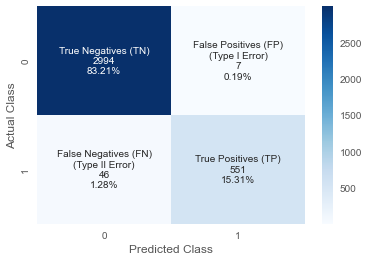

In [197]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Negatives (TN)", "False Positives (FP)\n(Type I Error)", "False Negatives (FN)\n(Type II Error)", "True Positives (TP)"]

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")

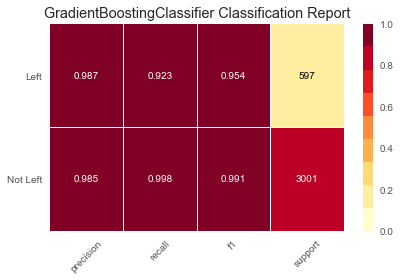

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [199]:
visualizer = yb_classification_report(GB_tuned, X_train, y_train, X_test, y_test, classes=["Not Left", "Left"], support=True)
visualizer.show()

In [200]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
Accuracy,0.986179,0.985270
Precision,0.989280,0.987455
Recall,0.926829,0.922948
f1,0.957037,0.954113


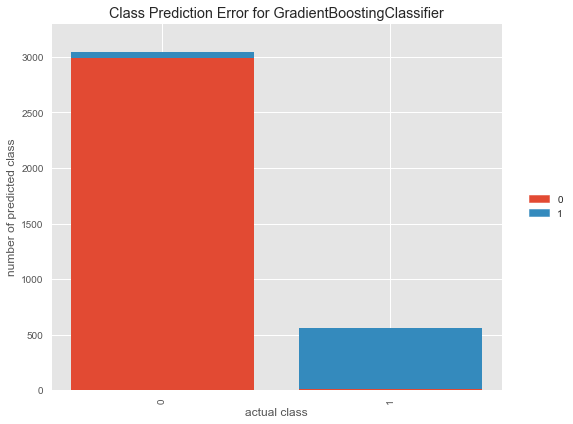

<AxesSubplot:title={'center':'Class Prediction Error for GradientBoostingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [201]:
from yellowbrick.classifier import ClassPredictionError

plt.figure(figsize=(9, 6))

visualizer = ClassPredictionError(GB_tuned)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof()

In [202]:
GB_Pred = {"Actual": y_test, "GB_Pred":y_pred}
GB_Pred = pd.DataFrame.from_dict(GB_Pred)
GB_Pred.head(20)

,Actual,GB_Pred
3109,0,0
10481,0,0
1104,1,1
3813,0,0
6864,0,0
9572,0,0
9703,0,0
8785,0,0
4821,0,0
179,1,1


In [203]:
Model_Preds = GB_Pred
Model_Preds.head(1)

,Actual,GB_Pred
3109,0,0


### Comparison of Models

In [204]:
compare = pd.DataFrame({"Model": ["GB_model", "GB_tuned"],
                        
                        "F1_Score": [GB_model_f1, GB_tuned_f1],
                                                 
                        "Accuracy_Score": [GB_model_acc, GB_tuned_acc],
                        
                        "Recall_Score": [GB_model_recall, GB_tuned_recall],
                       
                        "ROC_AUC_Score": [GB_model_auc, GB_tuned_auc]})

compare = compare.sort_values(by="Recall_Score", ascending=True)
fig = px.bar(compare, x = "Recall_Score", y = "Model", title = "Recall_Score")
fig.show()

compare = compare.sort_values(by="F1_Score", ascending=True)
fig = px.bar(compare, x = "F1_Score", y = "Model", title = "F1_Score")
fig.show()

compare = compare.sort_values(by="Accuracy_Score", ascending=True)
fig = px.bar(compare, x = "Accuracy_Score", y = "Model", title = "Accuracy_Score")
fig.show()

compare = compare.sort_values(by="ROC_AUC_Score", ascending=True)
fig = px.bar(compare, x = "ROC_AUC_Score", y = "Model", title = "ROC_AUC_Score")
fig.show()

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

In [213]:
import pickle

In [221]:
pickle.dump(GB_tuned, open('gradient_boosting_model', 'wb'))

In [215]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'departments', 'salary', 'left'],
      dtype='object')

In [295]:
col_lst = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'left', 'departments_RandD',
       'departments_accounting', 'departments_hr', 'departments_management',
       'departments_marketing', 'departments_product_mng', 'departments_sales',
       'departments_support', 'departments_technical', 'salary_low',
       'salary_medium']

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [296]:
# Save the encoder to a file using pickle
with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(ordinal_encoder, f)

In [297]:
employee = {
    "satisfaction_level": 1.0,
    "last_evaluation": 0.80,
    "number_projects":3,
    "average_monthly_hours": 190,
    "time_spent_company": 5,
    "work_accident": "Yes",
    "promotion_last_5years": "No",
    "departments": 'IT',
    "salary": 'low'
}

sample = pd.DataFrame.from_dict([employee])
sample

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,promotion_last_5years,departments,salary
0,1.0,0.8,3,190,5,Yes,No,IT,low


In [298]:
employee_churn_model = pickle.load(open("gradient_boosting_model", "rb"))
with open('scaler.pkl', 'rb') as f:
    employee_churn_scaler = pickle.load(f)
with open('ordinal_encoder.pkl', 'rb') as f:
    employee_churn_encoder = pickle.load(f)

In [300]:
df_transformed = sample.copy()
df_transformed[['departments','salary']] = employee_churn_encoder.transform(df_transformed[['departments','salary']])
df_transformed['work_accident'] = df_transformed.work_accident.map({'No':0,'Yes':1})
df_transformed['promotion_last_5years'] = df_transformed.promotion_last_5years.map({'No':0,'Yes':1})
df_transformed = employee_churn_scaler.transform(df_transformed)
df_transformed

array([[  1. ,   0.8,   3. , 190. ,   5. ,   1. ,   0. ,   0. ,   1. ]])

In [303]:
df2.departments.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [307]:
df2.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [318]:
df.sample(1).T

,143
satisfaction_level,0.37
last_evaluation,0.47
number_project,2
average_montly_hours,152
time_spend_company,3
Work_accident,0
left,1
promotion_last_5years,0
Departments,product_mng
salary,low


In [302]:
employee_churn_model.predict(df_transformed)

array([0], dtype=int64)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___